## Домашнее задание 3 (10 баллов)

## НИУ ВШЭ, 2024-25 учебный год

## Формат сдачи

Сам ноутбук называйте в формате hw-03-USERNAME.ipynb, где USERNAME — ваши фамилия и имя. Файл надо будет сдать в anytask.

## О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn, а также познакомитесь с plotly.

EDA - важный этап работы с данными. Именно в процессе EDA вы можете выяснить особенности датасета, найти зависимости в данных, протестировать гипотезы о взаимосвязях признаков и целевой переменной. В реальности вы сами будете определять, что и как проверять в рамках EDA, однако в данной работе гипотезы будут выдвинуты за вас автором задания. Также и типы графиков, которые вы будете использовать уже предопределены за вас. Выполняя задания по визуализациям, обращайте внимание на референсные картинки, которые были оставлены авторами. Они показывают, какой примерно результат от вас ожидается.

Это задание будет включать в себя построение некоторого количества графиков, потому вот основные правила, в соответствии с которыми графики должны быть оформлены:
1. Любой график всегда имеет название.
2. Оси у графика подписаны (исключение - график делит название оси с соседним).
3. Подписи делаются на одном языке (либо английский, либо русский), но не на их смеси.
4. Если вы выводите несколько графиков, то они размещаются в рамках одного объекта matplotlib.pyplot.figure. Вы не выводите графики последовательно, а смотрите, как их разместить сразу все за раз.
5. Отдельные графики (если графиков на картинке больше 1) также имеют свои названия.
6. Если на графике есть несколько различных объектов, то для их различения используется легенда. Помещайте легенду в место, где она в наименьшей мере мешает восприятию самого графика.
7. Если есть легенда, то она должна иметь навание, а также ее содержание должно быть адекватными (пожалейте проверяющих, они не хотят разбирать, а к чему относится зеленая линия, которая на легенде помечена меткой "0").
8. Используйте цветовые гаммы, чтобы объекты на графиках отличались цветом.
9. Текст на визуализации должен быть читаем. Если вы вывели названия категорий в качестве подписей на оси Х, а эти названия наезжают друг на друга, то вам нужно что-то с этим сделать. Нечитаемый или плохо читаемый (очень маленький, невероятно огромный) текст ведет к снижению баллов.

При работе с табличными данными используйте функционал [style](https://pandas.pydata.org/docs/user_guide/style.html#Builtin-Styles), чтобы визуально выделять необходимые элементы.

В этом задании будут оцениваться ваши развернутые комментарии, размышления и выводы (по построенным графикам): не скупитесь на них, но следите, чтобы выводы не были поверхностными и очевидными.

*Тут правило про плагиат, которое вам итак известно - обнуляются все работы, которые подозреваются в некорректных заимствованиях!* Помните, что просто скопировать код из интернета и указать источник - это не ваша самостоятельная работа, а автора кода. Измените хоть что-нибудь в коде.

## О данных

Будем работать с [датасетом физической активности](https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones).

В этом датасете собраны данные 30 человек, выполняющих различные действия со смартфоном на поясе. Данные записывались с помощью датчиков (акселерометра и гироскопа) в этом смартфоне. Были зафиксированы: "3-осевое линейное ускорение" (_tAcc-XYZ_) и "3-осевая угловая скорость" (_tGyro-XYZ_).

1. Все сигналы отсортированы по времени, пропущены через фильтр шума.
2. Все наблюдения были разделены на окна по 128 сигналов в каждом, причем окна пересекаются на 50% (грубо говоря, с 1 по 128 сигнал в 1 окно, с 64 до 192 сигнала - во 2 окно и так далее). То есть каждое окно покрывает 2.56 секунды данных (два шага человека при ходьбе, учитывая медленную походку пожилых людей).
3. Линейное ускорение было разделено на две составляющие (с помощью низкочастотного фильтра): ускорение самого тела, а также гравитационная составляющая. Будем называть их ускорением тела и гравитационным ускорением.
4. К получившимся окнам применяли различные функции для получения следующих показателей:
    - max
    - min
    - mad (median)
    - mean
    - std
    - skewness (коэффициент асимметричности распределения признака в окне)
    - etc. (подробнее, на сколько это возможно, указано в [самой статье](https://www.esann.org/sites/default/files/proceedings/legacy/es2013-84.pdf))
5. Величина (magnitude) сигнала также определялась через евклидову норму всех значений из вектора для одного окна.
6. К окнам было применено преобразование Фурье, чтобы получить частоты. Из частот были извелченыте же показатели, плюс новые:
    - bandsEnergy (энергия частотного интервала)
7. Были посчитаны углы между векторами соответствующих окон.
8. Для ускорений были посчитаны производные - рывки, к которым применялись те же функции.

Итог: в датасете каждый признак - это какая-то операция над вектором из 128 чисел, которые соответствуют замерам определенного человека занятого какой-то активностью на протяжении 2.56 секунд.

Как читать названия признаков? Примеры:
- `tBodyAccMag-mean()` - это вектор ускорений тела (без гравитационной составляющей этого ускорения), из которого взяли евклидову норму, а затем усреднили, чтобы получить скаляр
- `fBodyAcc-bandsEnergy()-1,8.2` - это вектор ускорения тела, к которому применили преобразование Фурье, преобразовав его в вектор частот, а затем посчитали на этом векторе энергию данного частотного интервала в определенном диапазоне частот (в данном случае 1 - 8.2)
- `angle(X,gravityMean)` - это угол между осью Х и вектором усредненных значений гравитационного ускорения из соответствующего окна

Вероятно, сначала покажется сложным, но мы разберемся с некоторыми признаками в отдельности и вы сможете понять их смысл, уже исходя из фактических соотношений.

## Предобработка данных

In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [221]:
train = pd.read_csv('train.csv')
test = pd.read_csv("test.csv")

In [222]:
train.shape

(7352, 563)

В датасете 563 признака, включая целевую переменную. Столько признаков нам не нужно. Мы за вас сделали подвыборку признаков для удобства работы с ними.

In [223]:
cols_subset = [
    'tBodyAccMag-mean()',  # усредненная величина ускорения тела
    'tBodyGyroJerk-mad()-X',  # медианная величина рывка тела по оси Х
    'tGravityAcc-min()-X',  # минимум гравитационной составляющей ускорения по оси Х
    'tBodyAcc-max()-X',  # максимальная величина ускорения тела по оси Х
    'fBodyAcc-bandsEnergy()-1,8.2',  # энергия ускорения тела в интервале частоты
    'angle(X,gravityMean)',  # угол между осью Х и усредненной гравитационной составляющей ускорения
    'angle(Y,gravityMean)',  # угол между осью Y и усредненной гравитационной составляющей ускорения
    'angle(Z,gravityMean)',  # угол между осью Z и усредненной гравитационной составляющей ускорения,
    'fBodyAcc-skewness()-X',  # асимметричность частоты ускорения тела по оси Х
    'subject',  # номер испытуемого
    'Activity',  # название вида деятельности (целевая переменная)
]

In [224]:
train = train[cols_subset]
test = test[cols_subset]

### Задание 1 (0.5 балла)

Посмотрите на пропуски и дубли в данных train и test. Есть ли они? Если есть, напишите, с чем это может быть связано? Если нет, то просто напишите, что пропусков и/или дублей нет.

In [225]:
print(train.isnull().sum().sum(), test.isnull().sum().sum()) #Проверка на пропуски (пропусков нет)
print(train.duplicated().sum(), test.duplicated().sum()) #Проверка на дубликаты (дубликатов нет)
print("пропусков и дублей нет")

0 0
0 0
пропусков и дублей нет


### Задание 2 (0.5 балла)

Выведите основные статистики данных: среднее, медиана, перцентили (0.25, 0.5, 0.75), минимум, максимум, стандартное отклонение. Посмотрите на таблицу и напишите, видите ли вы в ней что-нибудь интересное.

In [226]:
train.describe().merge(test.describe(), how='outer', left_index=True, right_index=True, suffixes=['_TRAIN', '_TEST'])

tBodyAccMag-mean()_TRAIN  tBodyGyroJerk-mad()-X_TRAIN  \
25%                   -0.983282                    -0.991595   
50%                   -0.883371                    -0.950268   
75%                   -0.106892                    -0.474625   
count               7352.000000                  7352.000000   
max                    1.000000                     1.000000   
mean                  -0.543884                    -0.727735   
min                   -1.000000                    -0.999889   
std                    0.477653                     0.315832   

       tGravityAcc-min()-X_TRAIN  tBodyAcc-max()-X_TRAIN  \
25%                     0.804270               -0.936219   
50%                     0.926693               -0.881637   
75%                     0.965095               -0.017129   
count                7352.000000             7352.000000   
max                     1.000000                1.000000   
mean                    0.678505               -0.468604   
min                    -1.000000               -1.000000   
std                     0.508656                0.544547   

       fBodyAcc-bandsEnergy()-1,8.2_TRAIN  angle(X,gravityMean)_TRAIN  \
25%                             -0.999480                   -0.812065   
50%                             -0.986582                   -0.709417   
75%                             -0.764508                   -0.509079   
count                         7352.000000                 7352.000000   
max                              1.000000                    1.000000   
mean                            -0.847963                   -0.489547   
min                             -1.000000                   -1.000000   
std                              0.233633                    0.511807   

       angle(Y,gravityMean)_TRAIN  angle(Z,gravityMean)_TRAIN  \
25%                     -0.017885                   -0.143414   
50%                      0.182071                    0.003181   
75%                      0.248353                    0.107659   
count                 7352.000000                 7352.000000   
max                      0.478157                    1.000000   
mean                     0.058593                   -0.056515   
min                     -1.000000                   -1.000000   
std                      0.297480                    0.279122   

       fBodyAcc-skewness()-X_TRAIN  subject_TRAIN  tBodyAccMag-mean()_TEST  \
25%                      -0.486841       8.000000                -0.978433   
50%                      -0.163271      19.000000                -0.861830   
75%                       0.155112      26.000000                -0.149596   
count                  7352.000000    7352.000000              2947.000000   
max                       1.000000      30.000000                 0.479547   
mean                     -0.128562      17.413085                -0.559043   
min                      -0.931208       1.000000                -0.998936   
std                       0.403686       8.975143                 0.439539   

       tBodyGyroJerk-mad()-X_TEST  tGravityAcc-min()-X_TEST  \
25%                     -0.989078                  0.836787   
50%                     -0.914698                  0.934930   
75%                     -0.486423                  0.970871   
count                 2947.000000               2947.000000   
max                      0.117606                  0.996148   
mean                    -0.735661                  0.696878   
min                     -1.000000                 -0.756774   
std                      0.282074                  0.502873   

       tBodyAcc-max()-X_TEST  fBodyAcc-bandsEnergy()-1,8.2_TEST  \
25%                -0.934447                          -0.999330   
50%                -0.852659                          -0.979336   
75%                -0.009965                          -0.799113   
count            2947.000000                        2947.000000   
max                 0.786436           

### Задание 3 (0.5 балла)

Данные сбалансированы? У вас есть 6 категорий активности (целевая переменная). Если одна из категорий представлена большим количеством наблюдений, а остальные - нет, то это обстоятельство, о котором хотелось бы знать заранее. Гиперболизированный пример: представьте, что у вас 1000 наблюдений, разделенных на два класса, и только 5 принадлежат ко второму классу. Как учить модель на такой выборке? Есть сильное подозрение, что многие модели будут склонны вырождаться в константу. Отсюда и необходимость проверять баланс классов.

Выведите количество наблюдений для всех категорий активности в train и test. Посчитайте разницу в процентах между самой крупной категорией и самой маленькой (самая большая категория - это 100%). Если разница (округленная до ближайшего целого числа) не превышает 30%, то давайте для наших целей считать, что данные сбалансированы. Напишите, сбалансированы ли данные в train и test.

In [227]:
observation_train = train.groupby('Activity').count()['subject']
observation_test = test.groupby('Activity').count()['subject']
observation_train.name, observation_test.name = 'observation', 'observation'
print(observation_train, "\n\n", observation_test, '\n\n')
diff1 = round((observation_train.max() - observation_train.min()) / observation_train.max() * 100)
diff2 = round((observation_test.max() - observation_test.min()) / observation_test.max() * 100)
print(f'разница для train: {diff1}', f'разница для test: {diff2}')
print("данные сбаллансированы")

Activity
LAYING                1407
SITTING               1286
STANDING              1374
WALKING               1226
WALKING_DOWNSTAIRS     986
WALKING_UPSTAIRS      1073
Name: observation, dtype: int64 

 Activity
LAYING                537
SITTING               491
STANDING              532
WALKING               496
WALKING_DOWNSTAIRS    420
WALKING_UPSTAIRS      471
Name: observation, dtype: int64 


разница для train: 30 разница для test: 22
данные сбаллансированы


### Задание 4 (0.5 балла)

Посчитайте корреляции всех признаков (включая таргет) со всеми другими. Какими получились значения? Есть идеи, почему так? Напишите ваши мысли.

In [228]:
train['Activity_codes'] = train['Activity'].factorize()[0]
print("Корреляции получились такими, потому что ускорение, угловые рывки и гравитационные составляющие движений связаны \nс движением тела. Логично, что корреляции высокие у похожих характеристик (например, среднее и максимальное ускорение), \nа сильные отрицательные значения возникают, когда два параметра изменяются в противоположных направлениях. \nОстальные показатели, которые не влияют как-либо друг на друга, показали слабые связи")
train[cols_subset[:-1] + ['Activity_codes']].corr()

Корреляции получились такими, потому что ускорение, угловые рывки и гравитационные составляющие движений связаны 
с движением тела. Логично, что корреляции высокие у похожих характеристик (например, среднее и максимальное ускорение), 
а сильные отрицательные значения возникают, когда два параметра изменяются в противоположных направлениях. 
Остальные показатели, которые не влияют как-либо друг на друга, показали слабые связи


tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  \
tBodyAccMag-mean()                      1.000000               0.899080   
tBodyGyroJerk-mad()-X                   0.899080               1.000000   
tGravityAcc-min()-X                     0.369962               0.380118   
tBodyAcc-max()-X                        0.959827               0.879900   
fBodyAcc-bandsEnergy()-1,8.2            0.697832               0.507939   
angle(X,gravityMean)                   -0.370849              -0.382246   
angle(Y,gravityMean)                    0.495561               0.478567   
angle(Z,gravityMean)                    0.426283               0.380967   
fBodyAcc-skewness()-X                   0.379796               0.266002   
subject                                -0.073652              -0.110321   
Activity_codes                          0.843173               0.717213   

                              tGravityAcc-min()-X  tBodyAcc-max()-X  \
tBodyAccMag-mean()                       0.369962          0.959827   
tBodyGyroJerk-mad()-X                    0.380118          0.879900   
tGravityAcc-min()-X                      1.000000          0.380404   
tBodyAcc-max()-X                         0.380404          1.000000   
fBodyAcc-bandsEnergy()-1,8.2             0.239088          0.613383   
angle(X,gravityMean)                    -0.988663         -0.384192   
angle(Y,gravityMean)                     0.797116          0.480229   
angle(Z,gravityMean)                     0.667415          0.405023   
fBodyAcc-skewness()-X                   -0.261676          0.335708   
subject                                 -0.042371         -0.055633   
Activity_codes                           0.066679          0.823796   

                              fBodyAcc-bandsEnergy()-1,8.2  \
tBodyAccMag-mean()                                0.697832   
tBodyGyroJerk-mad()-X                             0.507939   
tGravityAcc-min()-X                               0.239088   
tBodyAcc-max()-X                                  0.613383   
fBodyAcc-bandsEnergy()-1,8.2                      1.000000   
angle(X,gravityMean)                             -0.213318   
angle(Y,gravityMean)                              0.363170   
angle(Z,gravityMean)                              0.423927   
fBodyAcc-skewness()-X                             0.260316   
subject                                          -0.037000   
Activity_codes                                    0.666081   

                              angle(X,gravityMean)  angle(Y,gravityMean)  \
tBodyAccMag-mean()                       -0.370849              0.495561   
tBodyGyroJerk-mad()-X                    -0.382246              0.478567   
tGravityAcc-min()-X                      -0.988663              0.797116   
tBodyAcc-max()-X                         -0.384192              0.480229   
fBodyAcc-bandsEnergy()-1,8.2             -0.213318              0.363170   
angle(X,gravityMean)                      1.000000             -0.783848   
angle(Y,gravityMean)                     -0.783848              1.000000   
angle(Z,gravityMean)                     -0.643655              0.594885   
fBodyAcc-skewness()-X                     0.265523             -0.046213   
subject                                   0.026137             -0.009829   
Activity_codes                           -0.050553              0.234964   

                              angle(Z,gravityMean)  fBodyAcc-skewness()-X  \
tBodyAccMag-mean()                        0.426283               0.379796   
tBodyGyroJerk-mad()-X                     0.380967               0.266002   
tGravityAcc-min()-X                       0.667415              -0.261676   
tBodyAcc-max()-X                          0.405023               0.335708   
fBodyAcc-bandsEnergy()-1,8.2              0.423927               0.260316   
angle(X,gravityMean)                     -0.643655               0.265523   
angle(Y,gravityMean)                      0.594885              -0.046213   
an

Поздравляем! Вы предобработали данные для максимально комфортного их последующего анализа. Теперь вы готовы приступить к Exploratory Data Analysis!

## Exploratory Data Analysis

### Задание 5 (0.5 балла)

Вы проверили основную информацию о данных и составили свое первое впечатление о них. Теперь визуализации.

Начнем рисовать графики с небольшой разминки. Выберите две любые математические функции (отличные от линейной) и нарисуйте их на одном графике. Подпишите каждый из графиков, чтобы было понятно, какие функции вы выбрали. Ниже будет пример.

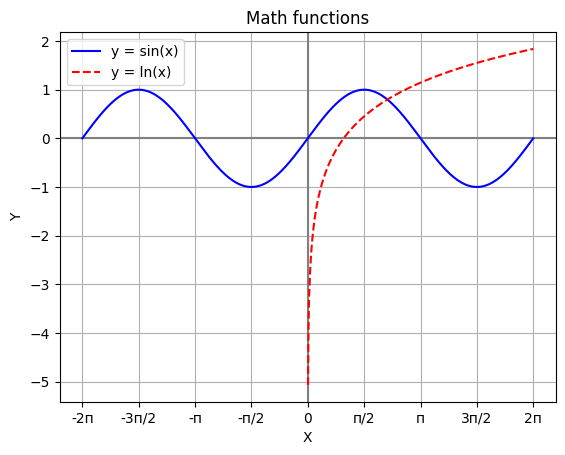

In [229]:
from os import linesep
fig, ax = plt.subplots()
x = np.linspace(-2*np.pi, 2*np.pi, 1000)
ax.axhline(0, color='gray', linewidth=1.5)
ax.axvline(0, color='gray', linewidth=1.5)
ax.plot(x, np.sin(x), color='b', label = 'y = sin(x)')
ax.plot(x, np.log(x), '--r', label = 'y = ln(x)')
ax.set_title('Math functions')
ax.set_ylabel('Y')
ax.set_xlabel('X')
ax.grid()
ax.set_xticks([-2*np.pi, -3*np.pi/2, -np.pi, -np.pi/2, 0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi], ['-2п', '-3п/2', '-п', '-п/2', '0', 'п/2', 'п', '3п/2', '2п'])
plt.legend()

### Задание 6 (0.5 балла)

Ранее мы уже проверили сбалансированность данных по разным категориям активностей в train и test сетах. Теперь визуализируйте количество сэмплов в каждой из категорий отдельно для train и test сетов, как в примере ниже. Проследите, чтобы порядок категорий слева и справа был одинаков. Иначе не очень удобно их сравнивать (когда они в разных местах двух графиков). Также заметьте, что в примере ось Х в одинаковом масштабе, что тоже удобно для сравнения.

Вам может пригодиться:
- plt.barh или ax.barh

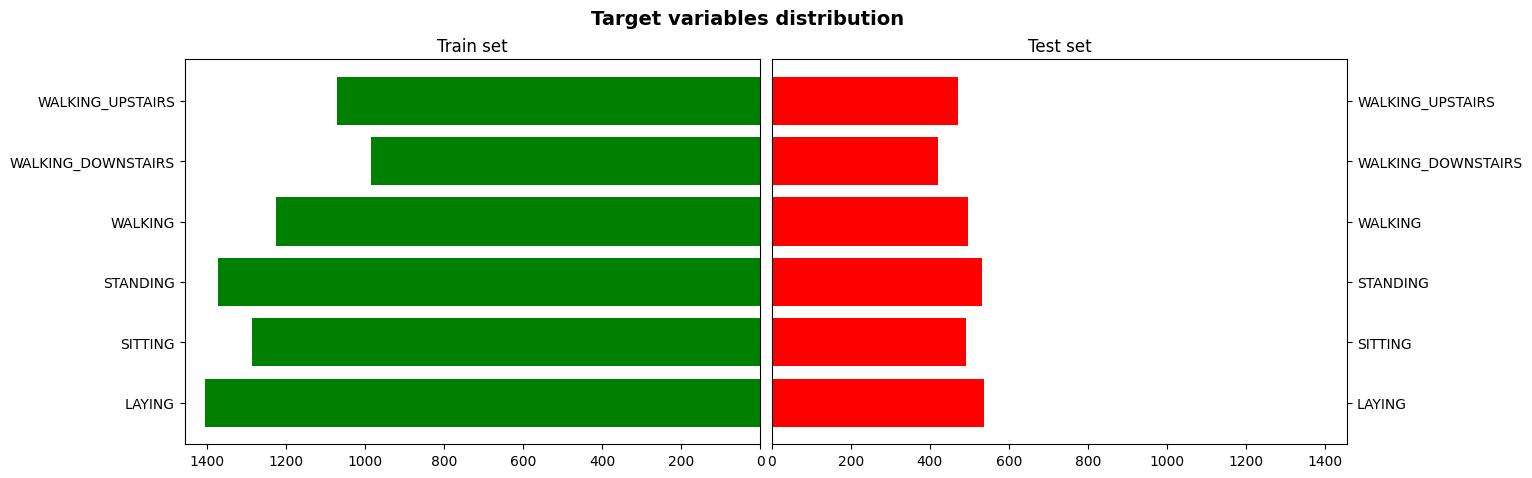

In [230]:
fig = plt.figure(figsize=(15, 5))
fig.suptitle('Target variables distribution', fontsize=14, fontweight="bold")
fig.subplots_adjust(wspace=0.02)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.barh(observation_train.index.to_list(), observation_train.values, color='green')
ax1.set_title('Train set')
ax1.set_xlim([0, max(max(observation_train.values), max(observation_test.values)) + 50])
ax1.invert_xaxis()

ax2.barh(observation_test.index.to_list(), observation_test.values, color='red')
ax2.yaxis.set_ticks_position('right')
ax2.set_title('Test set')
ax2.set_xlim([0, max(max(observation_train.values), max(observation_test.values)) + 50])

plt.show()

Правда на таких графиках проще проверять баланс классов таргета?)

### Задание 7 (0.5 балла)

Ранее вы выводили таблицу корреляций. Однако просто таблица корреляций не очень удобна для анализа. Что, если признаков было бы больше? Визуализируйте heatmap корреляций. Подпишите значения корреляций, округленные до 2 знаков после запятой, на графике и оставьте только те значения, которые по модулю не меньше 0.5. Будем считать такие корреляции существенными. Если будете брать код из семинарского ноутбука, то поменяйте в нем что-нибудь, например, цветовую гамму, иначе проверяющий будет карать :)

Какой признак стоит исключить из рассмотрения корреляций? Напишите его название, а также причину, почему нет смысла его рассматривать.

Вам может пригодиться:
- sns.heatmap
- методы get_text и set_text у атрибута texts графика

Надо исключить признак subject, так как он вообще не связан с всеми параметрами, в том числе и с таргетным параметром


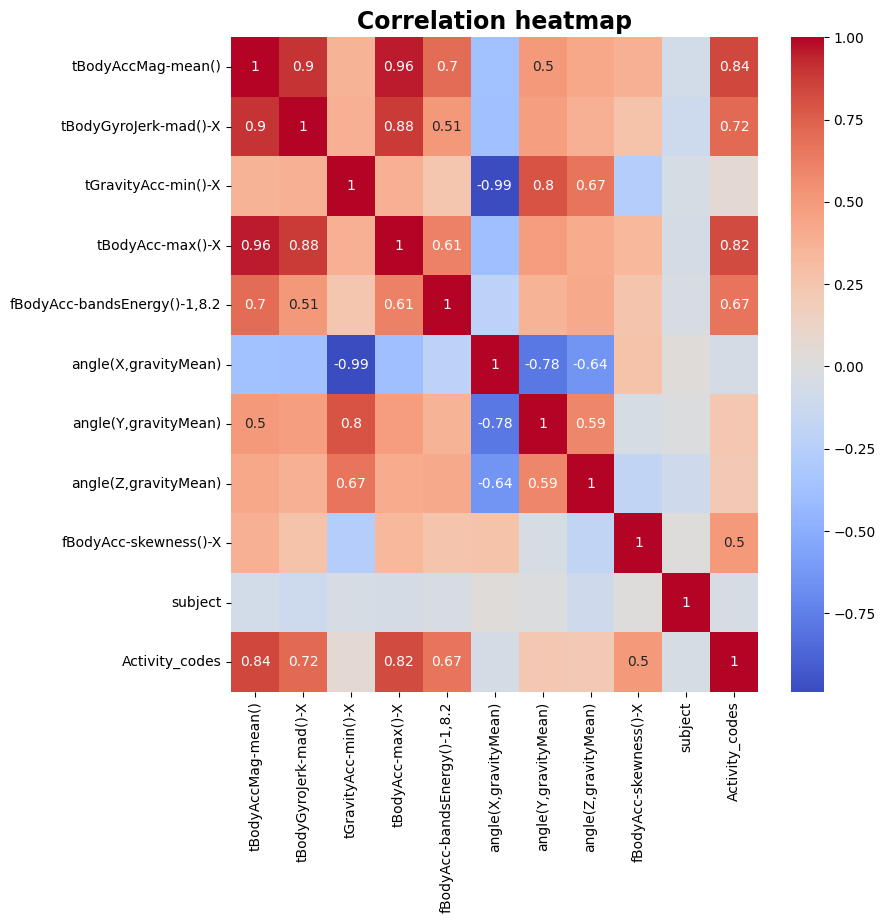

In [231]:
fig, ax = plt.subplots(figsize=(8.5,8.5))
plt.title('Correlation heatmap', fontsize=17, fontweight="bold")
sns.heatmap(train[cols_subset[:-1] + ['Activity_codes']].corr(), cmap='coolwarm', annot=True, fmt="0.2g", ax=ax)
for v in ax.texts:
    if float(v.get_text()) >= 0.5 or float(v.get_text()) <= -0.5:
        v.set_text(v.get_text())
    else:
        v.set_text("")
print("Надо исключить признак subject, так как он вообще не связан с всеми параметрами, в том числе и с таргетным параметром")

### Задание 8 (0.5 балла)

Для начала будем стрелять из пушки по воробьям. Выведите pairplot по всем данным train сета. Напишите, заметили ли вы в нем что-нибудь интересное, чего не было в таблицах и графиках ранее, а также сообщите, было ли вам удобно анализировать 100 графиков.

Можно сформулировать гипотезу об обратной зависимости параметров angle и tgravityacc-min. Но так много графиков перед глазами видеть неудобно


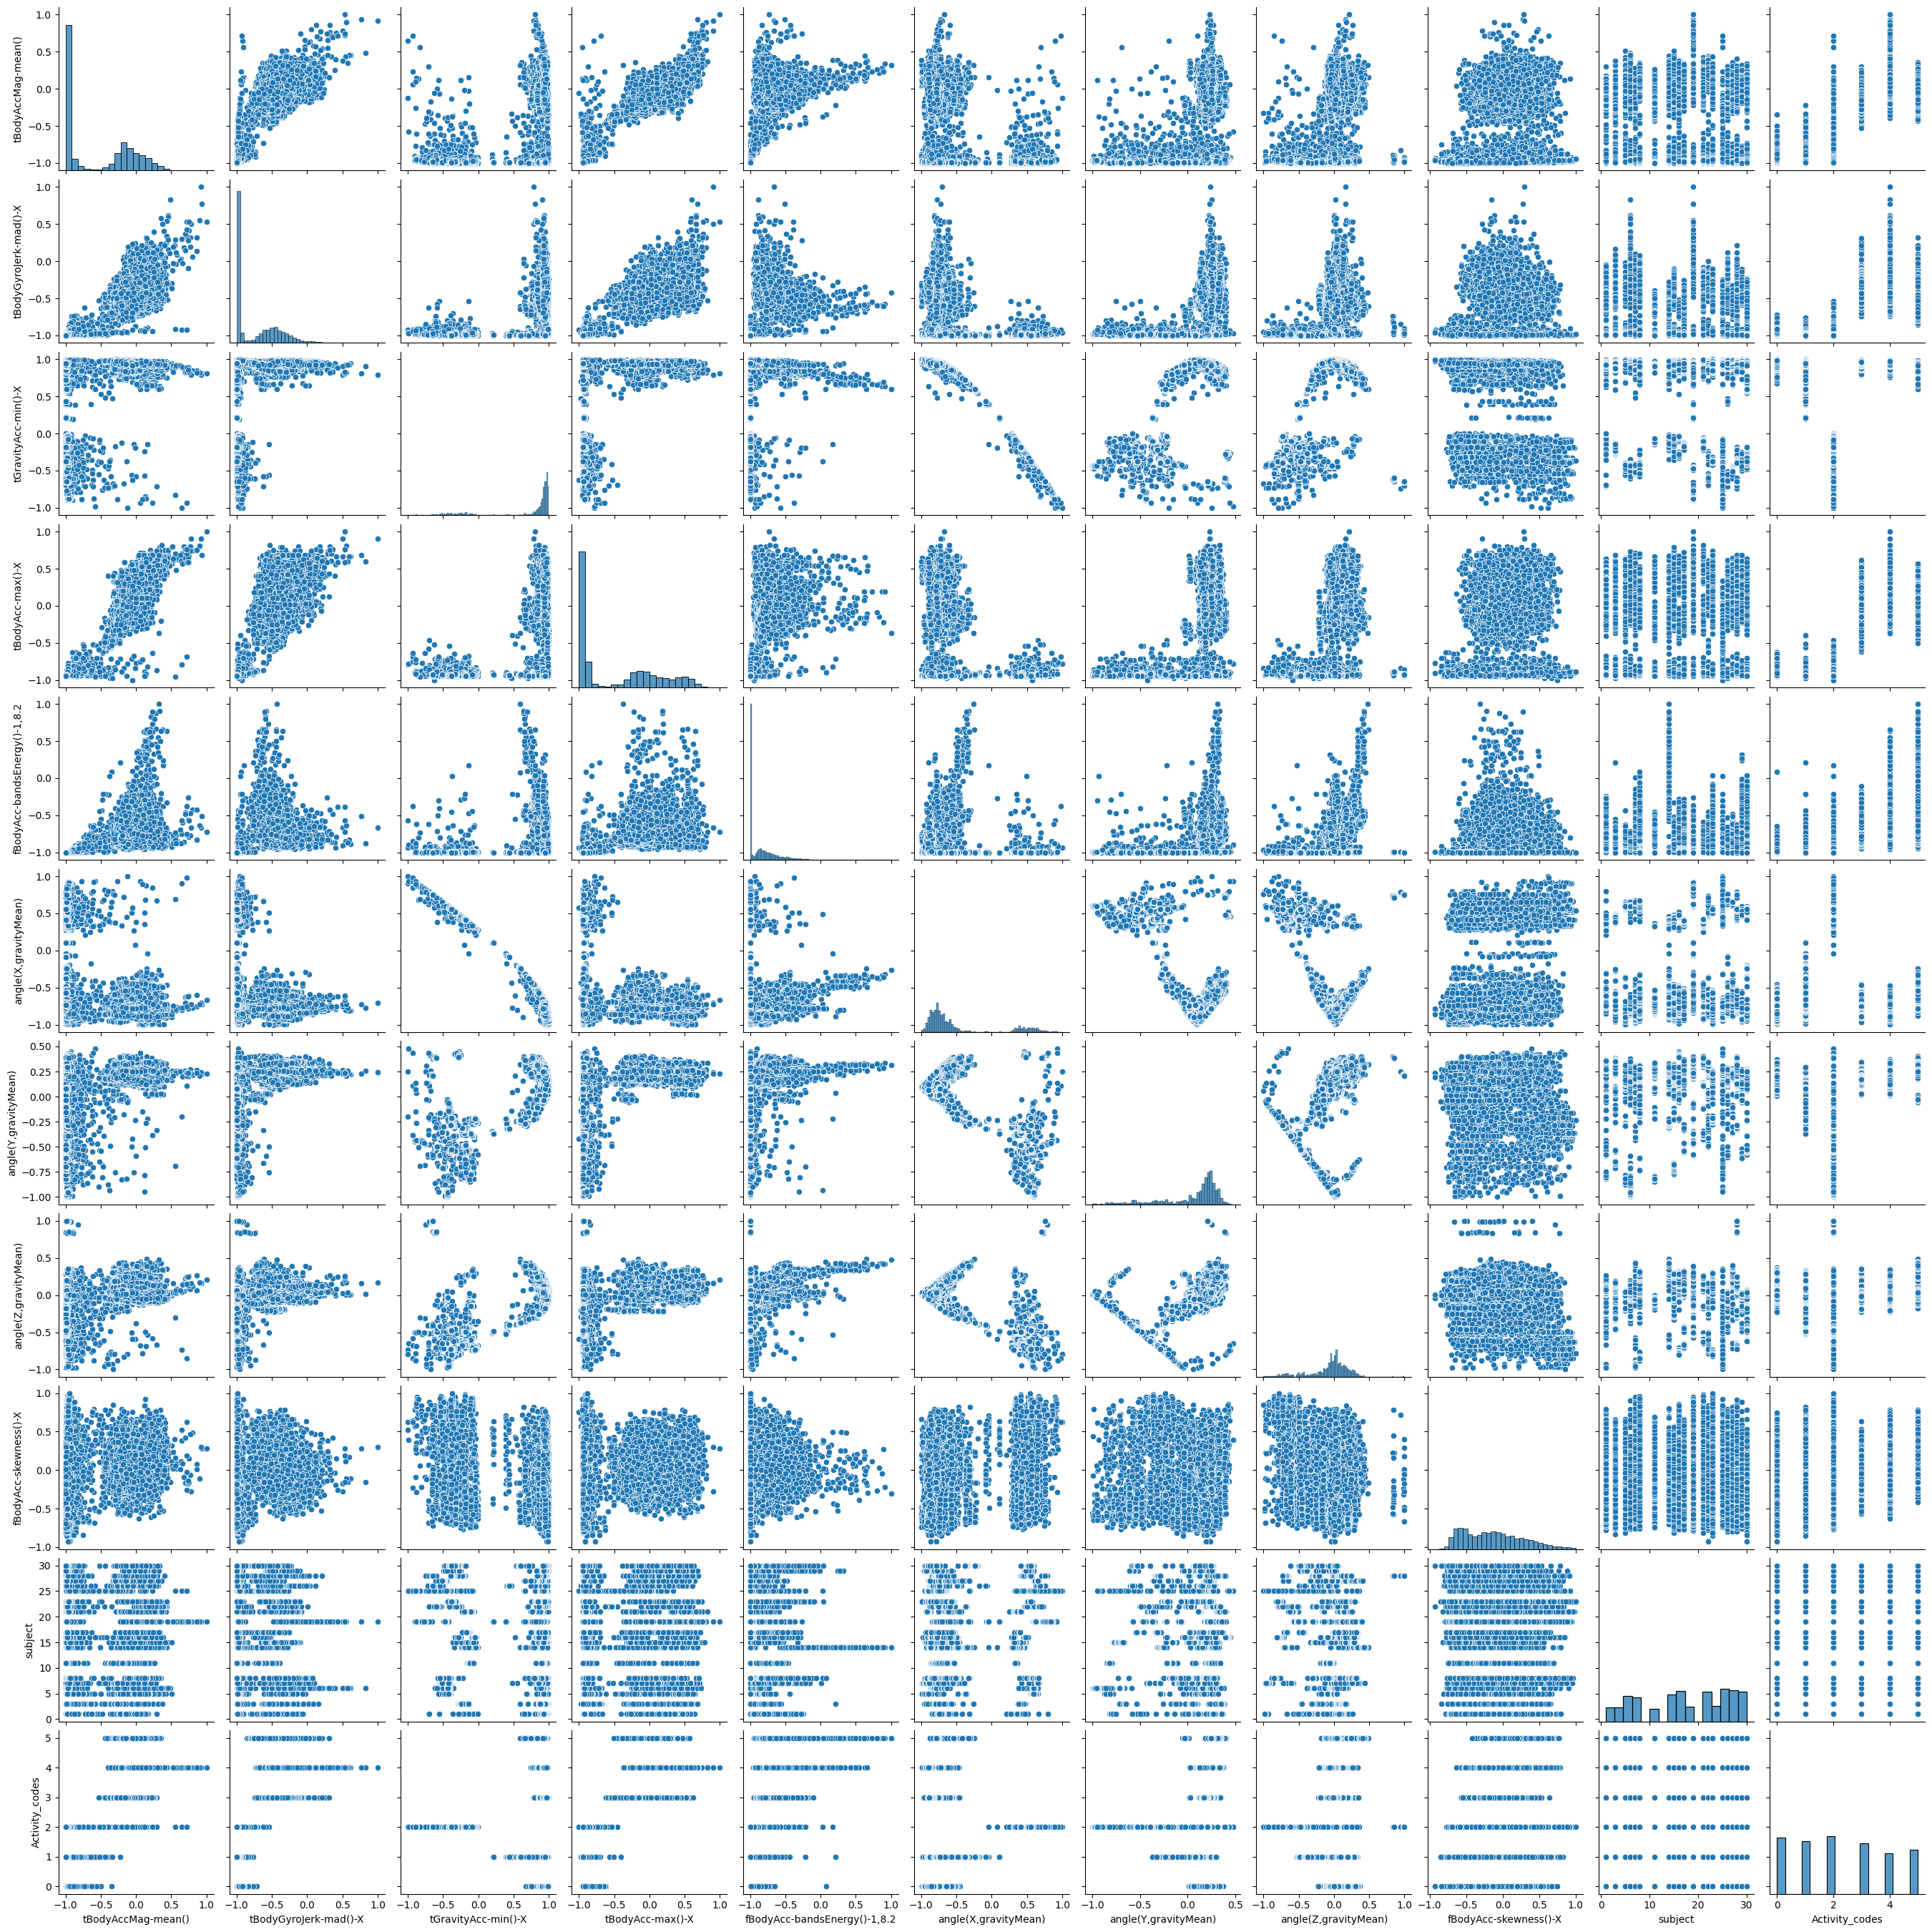

In [232]:
g = sns.pairplot(train)
print("Можно сформулировать гипотезу об обратной зависимости параметров angle и tgravityacc-min. Но так много графиков перед глазами видеть неудобно")

### Задание 9 (1 балл)

Окей. Смотреть на все сразу не очень удобно. Кажется, нужно смотреть на признаки в отдельности и искать в них инсайты.

Попробуем проверить гипотезу. Отобразите плотность распределения (kde) `tBodyAccMag-mean()` для каждой из активностей, как в примере ниже. Видите закономерность? Можно ли поделить все активности на две группы? Если да, то проведите вертикальную линию, которая визуально неплохо разделяет эти группы.

Давайте первую группу называть статическими активностями, а вторую - динамическими.

Посчитайте, какую долю правильных ответов дает ваша вертикальная линия для разделения именно этих двух групп. С чем может быть связан полученный вами результат? Предположите логическое обоснование (почему именно данный признак так хорошо/плохо разделяет группы активностей).

Вам может пригодиться:
- sns.kdeplot

accuracy: 0.9914309031556039


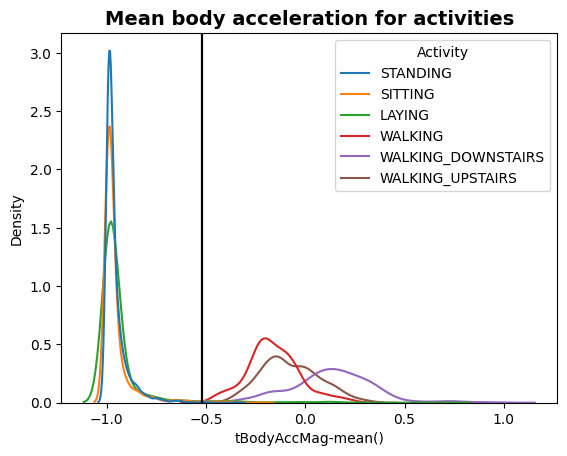

In [244]:
dif_coef = -0.52
plt.title('Mean body acceleration for activities', fontsize=14, fontweight="bold")
sns.kdeplot(train, x=train['tBodyAccMag-mean()'], hue=train['Activity'])
plt.axvline(dif_coef, color='black', linewidth=1.6)

train['Activ_type'] = 'dinamic'
train['Activ_type'][(train['Activity'] == 'STANDING') | (train['Activity'] == 'SITTING') | (train['Activity'] == 'LAYING')] = 'static'
train['activ_type_bycoef'] = 'dinamic'
train['activ_type_bycoef'][train['tBodyAccMag-mean()'] < dif_coef] = 'static'
train['compare_predict_with_answer'] = train['Activ_type'] == train['activ_type_bycoef']
accuracy = train['compare_predict_with_answer'].sum() / train['compare_predict_with_answer'].count()
print("accuracy:", accuracy)
#Этот признак так хорошо разделяет группы активностей, так как человек в статической активности не двигается и его ускорение отсутствует
#В остальных случаях оно присутствует при динамическом состоянии

### Задание 10 (0.5 балла)

Поздравляем, вы проверили первую гипотезу в процессе EDA. Однако нам бы хотелось уметь не группы разделять, а каждый отдельный вид активности. Попробуйте нарисовать "ящики с усами" для `angle(X,gravityMean)` с разделением по разным видам активности на данных train. Можно ли сделать какой-то вывод по полученной визуализации? Проанализируйте и проинтерпретируйте полученные картинки (если заметили какую-то особенность, может какая-то категория значительно выделяется, то предположите, почему так могло произойти).

Вам может пригодиться:
- sns.boxplot

Standing, Sitting, Walking, Walking Downstairs, Walking Upstairs) имеют угол, расположенный в диапазоне от -1 до 0, что говорит о более 
горизонтальной ориентации вектора гравитации. Laying выделяется, потому что в этом положении тело лежит горизонтально, и гравитация действует иначе, 
чем в вертикальных позах. 
Walking Upstairs отличается от Walking и Walking Downstairs, так как при подъеме человек наклоняется немного вперед, что может менять угол. 
Высокая вариативность Sitting может быть связана с разными позами во время сидения (наклон вперед, откидывание назад и т. д.).


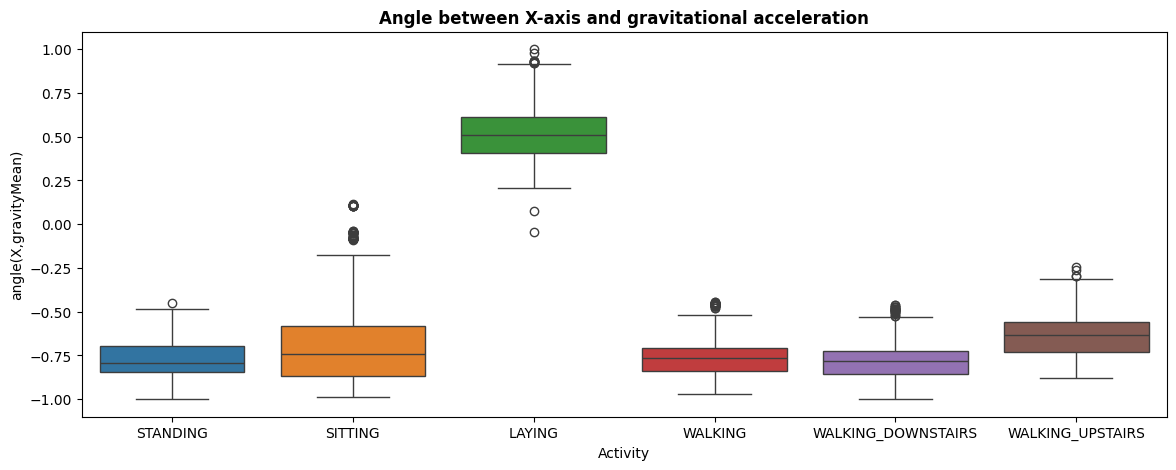

In [245]:
fig, ax = plt.subplots(figsize=(14,5))
sns.boxplot(train, y=train['angle(X,gravityMean)'], x=train['Activity'], hue=train['Activity'], legend=False, ax=ax)
plt.title('Angle between X-axis and gravitational acceleration', fontsize=12, fontweight="bold")
print("Standing, Sitting, Walking, Walking Downstairs, Walking Upstairs) имеют угол, расположенный в диапазоне от -1 до 0, что говорит о более \nгоризонтальной ориентации вектора гравитации. Laying выделяется, потому что в этом положении тело лежит горизонтально, и гравитация действует иначе, \nчем в вертикальных позах. \nWalking Upstairs отличается от Walking и Walking Downstairs, так как при подъеме человек наклоняется немного вперед, что может менять угол. \nВысокая вариативность Sitting может быть связана с разными позами во время сидения (наклон вперед, откидывание назад и т. д.).")

### Задание 11 (0.5 балла)

Посмотрим теперь на `tBodyAcc-max()-X`. Визуализируйте скрипичные диаграммы для этого признака с разделением по активностям на всем train. Кажется логичным, что максимальное ускорение в моменте для разных активностей будет различаться. Однако есть ли активность, которая будет выделяться? Если да, то предложите объяснение, почему эта активность выделяется.

Вам может пригодиться:
- sns.violinplot

Walking Downstairs выделяется как активность с наибольшим максимальным ускорением из-за характерных скачков ускорения при спуске


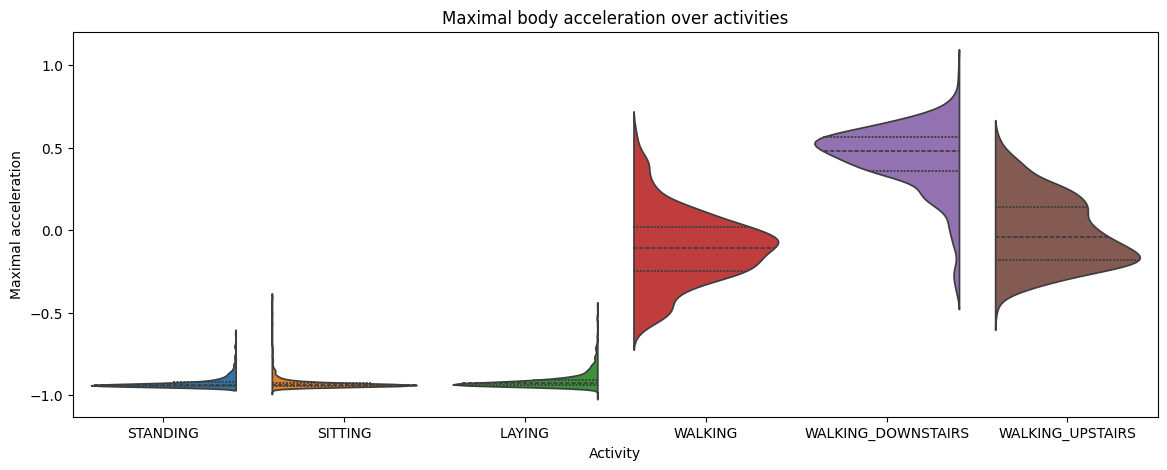

In [116]:
fig, ax = plt.subplots(figsize=(14,5))
sns.violinplot(train, y=train['tBodyAcc-max()-X'], x=train['Activity'], hue=train['Activity'], split=True, legend=False, inner="quart", ax=ax)
plt.title('Maximal body acceleration over activities', fontsize=12)
ax.set_ylabel('Maximal acceleration')
print("Walking Downstairs выделяется как активность с наибольшим максимальным ускорением из-за характерных скачков ускорения при спуске")

### Задание 12 (1 балл)

Вы уже можете с довольно хорошим качеством выделить две категории активности из шести. Продолжим.

Ранее уже упоминалось разделение на две группы активностей: статические и динамические. Пришла пора разделить датасет train на две части. Сделайте это! Теперь на одной картинке покажите распределения `fBodyAcc-bandsEnergy()-1,8.2` для динамичных активностей (`boxenplot` - немного измененый "ящик с усами") и `angle(Y,gravityMean)` для статических - тут хватит и простой гистограммы (прямо, как в примере ниже). Можно ли выделить еще какие-то активности? Если да, напишите, какие активности на 1 и 2 графиках выделяются.

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec (заметили, что один график больше другого? попробуйте сами так сделать - вам понравится...)
- sns.boxenplot
- sns.histplot

Выделяются активности walking_upstairs на 1ой диаграмме и standing на второй


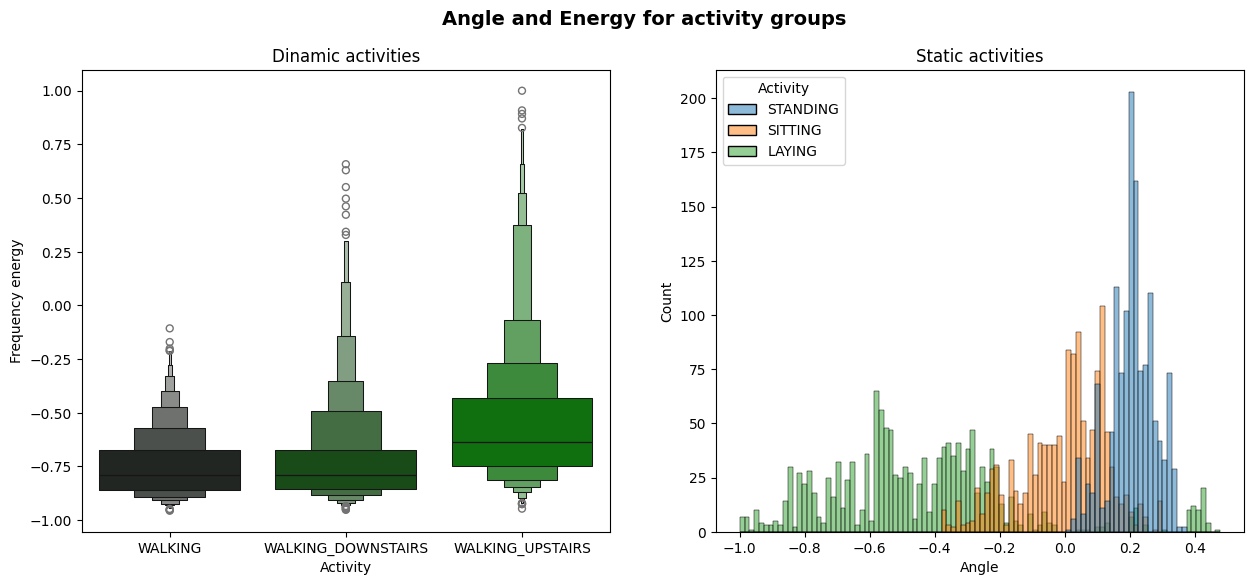

In [179]:
fig = plt.figure(figsize=(15,6))
fig.suptitle('Angle and Energy for activity groups', fontsize=14, fontweight="bold")
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
train_dinamic = train[(train['Activity'] == "WALKING") | (train['Activity'] == "WALKING_DOWNSTAIRS") | (train['Activity'] == "WALKING_UPSTAIRS")]
train_static = train[(train['Activity'] == "STANDING") | (train['Activity'] == "SITTING") | (train['Activity'] == "LAYING")]

ax1.set_title("Dinamic activities")
ax1.set_ylabel("Frequency energy")
sns.boxenplot(train_dinamic, y=train_dinamic['fBodyAcc-bandsEnergy()-1,8.2'], x=train_dinamic['Activity'], hue=train_dinamic['Activity'], color="g", ax=ax1)

ax2.set_title("Static activities")
ax2.set_ylabel("Count")
ax2.set_xlabel("Angle")
sns.histplot(train_static, x=train_static['angle(Y,gravityMean)'], hue=train_static['Activity'], ax=ax2, bins = 100)

print("Выделяются активности walking_upstairs на 1ой диаграмме и standing на второй")

### Задание 13 (0.5 балла)

Не всегда жизнь будет такой легкой, а данные будут полностью или почти линейно разделимы в одному признаку (иначе чем бы занимались дата саентисты...). Часто данные вообще ни по одному признаку нельзя адекватно разделить (да и по комбинациям признаков тоже). Давайте попробуем взять не один признак, а целых два!

Рассмотрим только статические активности. Будет снова два графика сразу. На первом графике будет боксплот распределения `fBodyAcc-skewness()-X` по активностям. А на втором попробуем взять не все наблюдения данной группы активностей, а только их часть. Разделимы ли категории по `fBodyAcc-skewness()-X`? А если взять только те строки, где `fBodyAcc-skewness()-X < -0.376`, и теперь вывести боксплот распределения `angle(Y,gravityMean)` по разным активностям? Попробуйте и напишите, выделилась ли какая-то категория?

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec
- sns.boxplot

На первом графике выделилась категория standing с большим кол-вом выбросов, а на втором laying аналогично


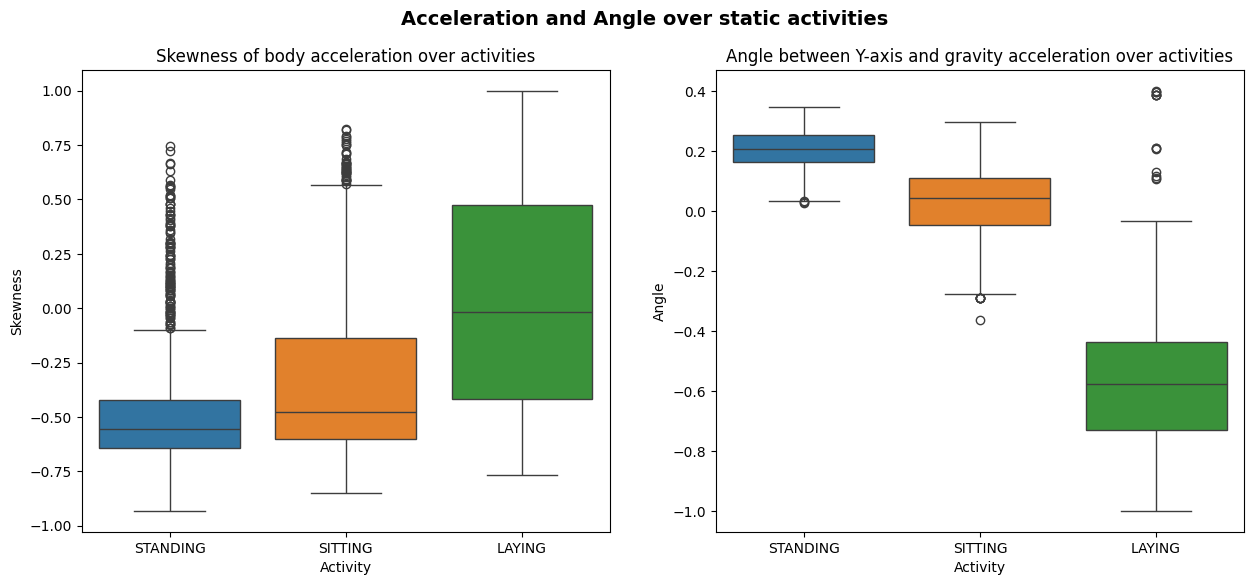

In [186]:
fig = plt.figure(figsize=(15,6))
fig.suptitle('Acceleration and Angle over static activities', fontsize=14, fontweight="bold")
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
train_static = train[(train['Activity'] == "STANDING") | (train['Activity'] == "SITTING") | (train['Activity'] == "LAYING")]

ax1.set_title("Skewness of body acceleration over activities")
ax1.set_ylabel("Skewness")
sns.boxplot(train_static, y=train_static['fBodyAcc-skewness()-X'], x=train_static['Activity'], hue=train_static['Activity'], ax=ax1)

ax2.set_title("Angle between Y-axis and gravity acceleration over activities")
ax2.set_ylabel("Angle")
sns.boxplot(train_static[train_static['fBodyAcc-skewness()-X'] < -0.376], y=train_static[train_static['fBodyAcc-skewness()-X'] < -0.376]['angle(Y,gravityMean)'], x=train_static[train_static['fBodyAcc-skewness()-X'] < -0.376]['Activity'], hue=train_static[train_static['fBodyAcc-skewness()-X'] < -0.376]['Activity'], ax=ax2)
print("На первом графике выделилась категория standing с большим кол-вом выбросов, а на втором laying аналогично")

Поздравляем, теперь вы на шажок ближе к тому, чтобы стать решающим деревом!

### Задание 14 (1 балл)

Вот и осталась лишь одна активность, которую мы никак не выделили. Попробуем и ее какими-то порогами отделить от всех остальных. Да, можно было бы сказать, что, раз уж мы выделили 5 из 6 категорий, то все остальное - это и есть последняя категория, но мы не идем легкими путями. Выделить оставшуюсь категорию с хорошим качеством не так уж и просто. Из доступных признаков, сначала посмотрите на распределение `tBodyAcc-max()-X` на динамических активностях (скрипичная диаграмма отлично подойдет).

А теперь спускаем вам порог `tBodyAcc-max()-X < 0.157`. Для таких строк постройте диаграмму рассеяния для признака `tGravityAcc-min()-X`. Да, получается неидеально, но это честная работа. Можно выбрать порог так, чтобы чисто из таблицы с динамическими активностями из строк, где `tBodyAcc-max()-X < 0.157`, выбрать по некоторому порогу для `tGravityAcc-min()-X` строки так, чтобы доля правильных ответов на оставшейся категории была не меньше 83%!

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec
- sns.violinplot
- sns.swarmplot (иногда лучше подходит, чем просто sns.scatterplot)

Обратите внимание, что подписи к осям можно убирать методами plt. Например, если у вас общее название для оси Y для обоих графиков, то можно не подписывать ось Y у второго графика.

<Axes: title={'center': 'Minimal gravity acceleration over activities'}, xlabel='Activity', ylabel=' '>

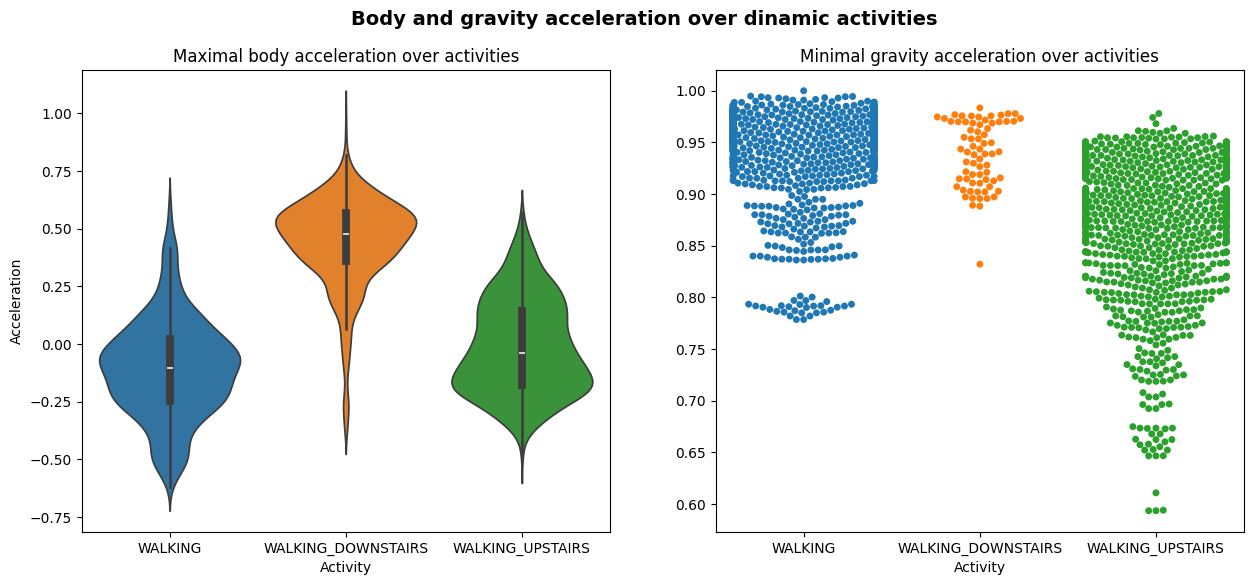

In [198]:
fig = plt.figure(figsize=(15,6))
fig.suptitle('Body and gravity acceleration over dinamic activities', fontsize=14, fontweight="bold")
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.set_title("Maximal body acceleration over activities")
ax1.set_ylabel("Acceleration")
sns.violinplot(train_dinamic, y=train_dinamic['tBodyAcc-max()-X'], x=train_dinamic['Activity'], hue=train_dinamic['Activity'],  ax=ax1)


ax2.set_title("Minimal gravity acceleration over activities")
ax2.set_ylabel(" ")
sns.swarmplot(train_dinamic[train_dinamic['tBodyAcc-max()-X'] < 0.157], y=train_dinamic[train_dinamic['tBodyAcc-max()-X'] < 0.157]['tGravityAcc-min()-X'], x=train_dinamic[train_dinamic['tBodyAcc-max()-X'] < 0.157]['Activity'], hue=train_dinamic[train_dinamic['tBodyAcc-max()-X'] < 0.157]['Activity'], ax=ax2)


### Задание 15 (0.5 балла)

Теперь попробуем более интерактивные графики. Установите библиотеку `plotly` (обычно `pip install plotly` или `conda install plotly`). Синтаксис очень похож на `seaborn`, но вот [документация для plotly.express](https://plotly.com/python-api-reference/plotly.express.html).

Сначала подготовим данные для визуализации. Будем считать t-SNE просто "черным ящиком", который принимает наши данные и проецирует их в двумерное или трехмерное пространство. Возможно, придется немного подождать.

In [199]:
%%time
from sklearn.manifold import TSNE
tsne = TSNE(random_state=666, n_components=2)
new = tsne.fit_transform(train.drop(['subject', 'Activity'], axis=1))
df_2_comp = pd.concat([
    pd.DataFrame(new, columns=['x', 'y']),
    train['Activity']
], axis=1)

tsne = TSNE(random_state=666, n_components=3)
new = tsne.fit_transform(train.drop(['subject', 'Activity'], axis=1))
df_3_comp = pd.concat([
    pd.DataFrame(new, columns=['x', 'y', 'z']),
    train['Activity']
], axis=1)

CPU times: user 2min 34s, sys: 316 ms, total: 2min 34s
Wall time: 2min 34s


Теперь нарисуйте scatter-график через `plotly.express` для `df_2_comp` с выделением цветами активностей. Красиво получилось? Видны скопления точек одного цвета? Можно разные активности отделить линиями на данном графике?

In [211]:
import plotly.express as px
fig = px.scatter(df_2_comp, 'x', 'y', color='Activity')
fig.show()
print("Получилось красиво. Скопления точек видны. Отделить линиями активности можно")

Получилось красиво. Скопления точек видны. Отделить линиями активности можно


Мы не отстаем от трендов и тоже можем в 3D. Сейчас и вы научитесь (если еще не умеете). Нарисуйте scatter_3d-график через `plotly.express` для `df_3_comp` с выделением цветами активностей. Повращайте его. Нормально получилось? Есть ли какая-то структура у точек?

In [212]:
fig = px.scatter_3d(df_3_comp, x='x', y='y', z='z', color='Activity')
fig.show()
print("Получилось нормально. Точки собраны в облако, сами имеют шарообразную структуру")

Получилось нормально. Точки собраны в облако, сами имеют шарообразную структуру


### Задание 16 (1 балл)

Мы сделали вам fit. Ваша очередь сделать predict. Допишите функцию, которая принимает на вход датафрейм с признаками, а выдает вектор из предсказаний - для каждой строки датафрейма вы определяете, к какому классу принадлежит объект. Рекомендуем сразу записывать из строками, а не кодировать в числа. Дальше фукнция `accuracy_score` выдаст вам долю правильных ответов.

Подсказка: вы уже отделили категории друг от друга по каким-то признакам. Воспользуйтесь этим знанием! Используя только проведенный вами анализ можно спокойно выбить не менее 75% на train и test! Если вы получите меньше 75%, то балл будет снижен. Авторское решение (на основе всех графиков выше) выбивает 81% и 77% на train и test соответственно. [Шпаргалка с готовыми идеями для такой задачи](https://rutube.ru/video/f884aa6ed5f94120b7304506042fe5bb/)

In [ ]:
def predict(df: pd.DataFrame):
    # ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ your code here
    pass

def accuracy_score(y_true, y_pred) -> float:
    y_true = np.asarray(y_true).reshape(-1, 1)
    y_pred = np.asarray(y_pred).reshape(-1, 1)
    return (y_true == y_pred).mean()

In [ ]:
train_preds = predict(train)
test_preds = predict(test)
print(f"Accuracy on train set => {accuracy_score(train['Activity'], train_preds)}")
print(f"Accuracy on test set => {accuracy_score(test['Activity'], test_preds)}")

Accuracy on train set => 0.8109357997823722
Accuracy on test set => 0.7757041058703766


__Место для мема и/или фидбэка__

> устал